# Домашняя работа №1

**Срок сдачи:** 9 октября 2017, 23:59 <br/>
Штраф за опоздание: -1 балл за каждый день

Файл с дз надо загрузить по [ссылке](https://www.dropbox.com/request/fN13dbdM4Cz1no5bwyF9)<br/>
Постарайтесь назвать файл по следующему формату:** [ИАД-*{Номер}*] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br/>

Сопровождайте ваш код изображеними, комментариями и выводами. <br/>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data = pd.read_csv('data_hw1/titanium.csv')

In [236]:
data.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [237]:
X_init = data['x']
y_init = data['y']

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [238]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_init)
X = pd.Series(scaler.transform(X_init), name = 'X').reshape(-1, 1)
y = pd.Series(y_init, name = 'y').reshape(-1, 1)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/andrey_lukya

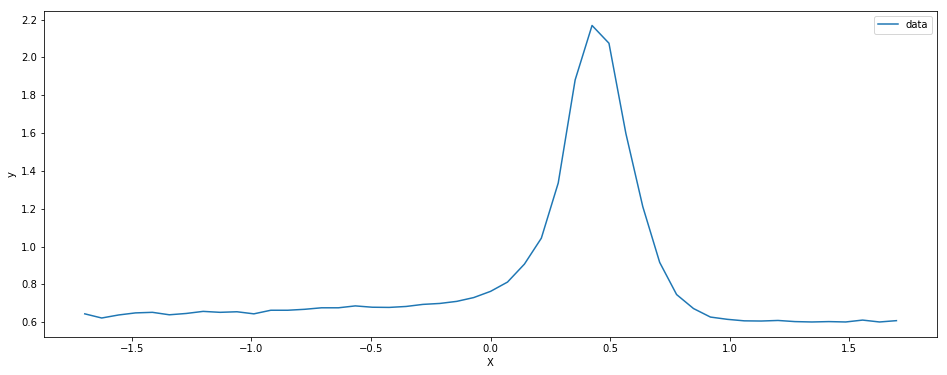

In [239]:
plt.figure(figsize=(16,6))
plt.plot(X,y,label='data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [250]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

folds = KFold(n_splits=3, random_state=42, shuffle=True)

parameters = {'C': np.linspace(0.1,100000,20)}
svr_lin = SVR(kernel='linear', epsilon=0.01)
svr_pol = SVR(kernel='poly', epsilon=0.01, degree=3, gamma=6, coef0=1)
svr_rbf = SVR(kernel='rbf', epsilon=0.01, gamma=6, coef0=1)

Copt_lin = GridSearchCV(svr_lin, param_grid = parameters, 
                        cv=ShuffleSplit(test_size=0.20, n_splits=1, random_state=0),
                        scoring='neg_mean_absolute_error')
Copt_lin.fit(X, y)

Copt_pol = GridSearchCV(svr_pol, param_grid = parameters,
                        cv=ShuffleSplit(test_size=0.20, n_splits=1, random_state=0), 
                        scoring='neg_mean_absolute_error')
Copt_pol.fit(X, y)

Copt_rbf = GridSearchCV(svr_rbf, param_grid = parameters, 
                        cv=ShuffleSplit(test_size=0.20, n_splits=1, random_state=0), 
                        scoring='neg_mean_absolute_error')
Copt_rbf.fit(X, y)

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d

/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andrey_lukyanov/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=1, degree=3, epsilon=0.01, gamma=6,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-01,   5.26325e+03,   1.05264e+04,   1.57896e+04,
         2.10527e+04,   2.63159e+04,   3.15790e+04,   3.68422e+04,
         4.21053e+04,   4.73685e+04,   5.26316e+04,   5.78948e+04,
         6.31579e+04,   6.84211e+04,   7.36842e+04,   7.89474e+04,
         8.42105e+04,   8.94737e+04,   9.47368e+04,   1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

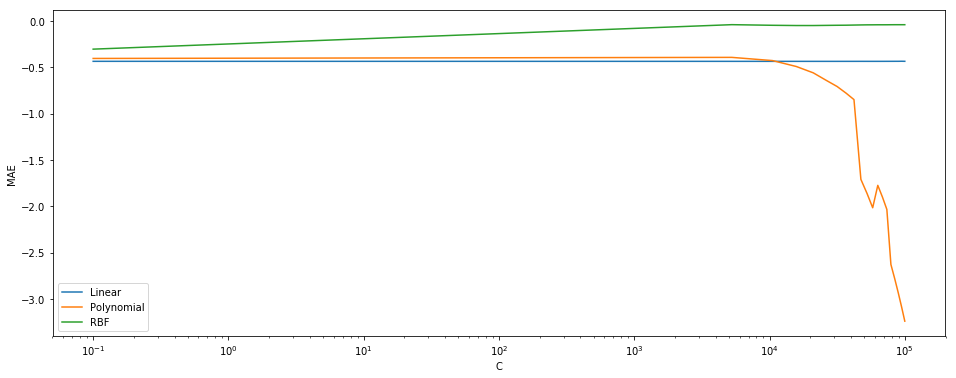

In [255]:
gridopt_lin = pd.DataFrame(Copt_lin.cv_results_)
gridopt_pol = pd.DataFrame(Copt_pol.cv_results_)
gridopt_rbf = pd.DataFrame(Copt_rbf.cv_results_)

plt.figure(figsize=(16,6))
plt.plot(gridopt_lin.param_C,gridopt_lin.mean_test_score,label='Linear')
plt.plot(gridopt_pol.param_C,gridopt_pol.mean_test_score,label='Polynomial')
plt.plot(gridopt_rbf.param_C,gridopt_rbf.mean_test_score,label='RBF')
plt.xlabel('C')
plt.ylabel('MAE')
plt.xscale('log')
plt.legend()

In [252]:
%%bash 
say -v Daniel The programm execution has been finished

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [130]:
texts = []

en = open('./data_hw1/war_and_peace_en.txt')
lines = en.readlines()
en_lines = pd.DataFrame([i.strip() for i in lines], columns = ['Word'])
en_lines['Label'] = np.ones((len(en_lines), 1))


es = open('./data_hw1/war_and_peace_es.txt')
lines = es.readlines()
es_lines = pd.DataFrame([i.strip() for i in lines], columns = ['Word'])
es_lines['Label'] = np.zeros((len(es_lines), 1))

words = pd.concat([en_lines, es_lines])

words.head()

,Word,Label
0,war,1.0
1,and,1.0
2,peace,1.0
3,leo,1.0
4,tolstoy,1.0


In [146]:
X = words['Word']
y = words['Label']

## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [ ]:
%%bash
say -v Daniel The programm execution has been finished

In [17]:
import random

RND_SEED = random.seed(42)

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(words['Word'], words['Label'], 
                                                    train_size=0.8, random_state=RND_SEED)

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

model = Pipeline(
[
    ('vect', CountVectorizer(analyzer='char', ngram_range=(1, 6))),
    ('svm', SVC(kernel='linear', ))
])
#model.fit(X_train, y_train)

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

Попробуем различные варианты н-грамов:

In [137]:
n_gram_params = {
    'vect__ngram_range': ((1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3),
                          (1, 4), (2, 4), (3, 4), (4, 4), (1, 5), (2, 5),
                          (3, 5), (4, 5), (5, 5), (1, 6), (2, 6), (3, 6),
                          (4, 6), (5, 6), (6, 6))
              }

Если в GridSearchCV поставить параметр cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0), то кросс-валидация будет происходить с одним фолдом. Воспользуемся этим:

In [139]:
ngram_opt = GridSearchCV(estimator=model, param_grid=n_gram_params, 
                         cv=ShuffleSplit(test_size=0.20, n_splits=1, random_state=0),
                         scoring='accuracy')

In [147]:
ngram_opt.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'vect__ngram_range': ((1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3), (1, 4), (2, 4), (3, 4), (4, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6))},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [150]:
pd.DataFrame(ngram_opt.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_vect__ngram_range,params,rank_test_score,split0_test_score,split0_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
10,2.823842,0.474060,0.955721,0.985201,"(1, 5)","{'vect__ngram_range': (1, 5)}",1,0.955721,0.985201,0.0,0.0,0.0,0.0
15,2.858945,0.461149,0.955283,0.985310,"(1, 6)","{'vect__ngram_range': (1, 6)}",2,0.955283,0.985310,0.0,0.0,0.0,0.0
11,3.211644,0.326627,0.954406,0.985091,"(2, 5)","{'vect__ngram_range': (2, 5)}",3,0.954406,0.985091,0.0,0.0,0.0,0.0
3,3.269270,0.325609,0.953529,0.977088,"(1, 3)","{'vect__ngram_range': (1, 3)}",4,0.953529,0.977088,0.0,0.0,0.0,0.0
4,2.631097,0.264100,0.953529,0.976540,"(2, 3)","{'vect__ngram_range': (2, 3)}",4,0.953529,0.976540,0.0,0.0,0.0,0.0


Теперь, когда мы нашли наиболее оптимальные комбинации н-грамов, можно занаться подбором С:

In [191]:
C_params = {'svm__C': np.linspace(0.1, 100, 20),
            'vect__ngram_range': ((1, 5), (1, 6), (2, 6))}

In [192]:
C_opt = GridSearchCV(estimator=model, param_grid=C_params, 
                         cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0),
                         scoring='accuracy')

In [193]:
C_opt.fit(X, y)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 6), preprocessor=None, stop_words=None,
        strip...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svm__C': array([   0.1    ,    5.35789,   10.61579,   15.87368,   21.13158,
         26.38947,   31.64737,   36.90526,   42.16316,   47.42105,
         52.67895,   57.93684,   63.19474,   68.45263,   73.71053,
         78.96842,   84.22632,   89.48421,   94.74211,  100.     ]), 'vect__ngram_range': ((1, 5), (1, 6), (2, 6))},
       pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [196]:
C_opt_grid = pd.DataFrame(C_opt.cv_results_).sort_values('rank_test_score')

In [214]:
C_opt_grid.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_svm__C,param_vect__ngram_range,params,rank_test_score,split0_test_score,split0_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
43,2.840052,0.456290,0.953529,0.98542,73.7105,"(1, 6)","{'svm__C': 73.7105263158, 'vect__ngram_range':...",1,0.953529,0.98542,0.0,0.0,0.0,0.0
49,2.851236,0.458184,0.953529,0.98542,84.2263,"(1, 6)","{'svm__C': 84.2263157895, 'vect__ngram_range':...",1,0.953529,0.98542,0.0,0.0,0.0,0.0
22,2.845658,0.455479,0.953529,0.98542,36.9053,"(1, 6)","{'svm__C': 36.9052631579, 'vect__ngram_range':...",1,0.953529,0.98542,0.0,0.0,0.0,0.0
28,2.912474,0.462802,0.953529,0.98542,47.4211,"(1, 6)","{'svm__C': 47.4210526316, 'vect__ngram_range':...",1,0.953529,0.98542,0.0,0.0,0.0,0.0
19,2.906416,0.459123,0.953529,0.98542,31.6474,"(1, 6)","{'svm__C': 31.6473684211, 'vect__ngram_range':...",1,0.953529,0.98542,0.0,0.0,0.0,0.0


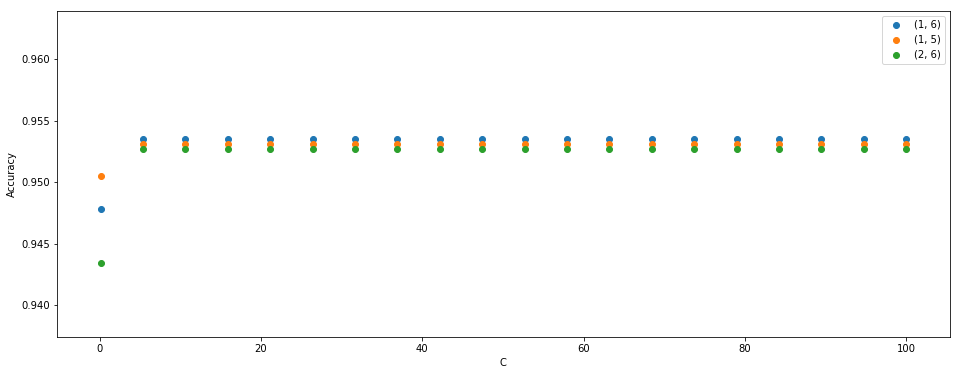

In [213]:
plt.figure(figsize=(16,6))
plt.scatter(C_opt_grid[C_opt_grid['param_vect__ngram_range'] == (1, 6)]['param_svm__C'], 
         C_opt_grid[C_opt_grid['param_vect__ngram_range'] == (1, 6)]['mean_test_score'],
         label='(1, 6)')
plt.scatter(C_opt_grid[C_opt_grid['param_vect__ngram_range'] == (1, 5)]['param_svm__C'], 
         C_opt_grid[C_opt_grid['param_vect__ngram_range'] == (1, 5)]['mean_test_score'],
         label='(1, 5)')
plt.scatter(C_opt_grid[C_opt_grid['param_vect__ngram_range'] == (2, 6)]['param_svm__C'], 
         C_opt_grid[C_opt_grid['param_vect__ngram_range'] == (2, 6)]['mean_test_score'],
         label='(2, 6)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()

Как можно заметить, параметр С после определенного значения не влияет на метрику.

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [369]:
RND_SEED = 


SyntaxError: invalid syntax (<ipython-input-369-8a2a5e5a81f1>, line 1)

In [370]:
idx_rst = words.sample(len(words)).reset_index()
idx_rst.head()

,index,Word,Label
0,3576,his,1.0
1,751,the,1.0
2,3156,tavolino,0.0
3,5724,questa,0.0
4,2371,the,1.0


In [371]:
idx_rst.drop('index', axis=1, inplace=True)

In [401]:
X = idx_rst[:1000].sample(1000)[:1000]

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X.index.tolist(), X['Label'], 
                                                    train_size=0.8)

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [332]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]

In [396]:
def string_kernel(U, V):
    kernel = np.zeros((len(U), len(V)))
    for i in range(len(U)):            
        for j in range(len(V)):
            distance = wfi_levenshtein(idx_rst.Word[int(U[i])], idx_rst.Word[int(V[j])])
            kernel[i,j]=np.exp(-np.linalg.norm(distance)**2)
    return kernel

In [403]:
kernel = string_kernel(X_train, X_train)

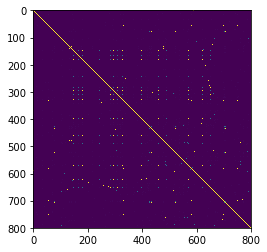

In [407]:
plt.imshow(kernel)

In [422]:
clf = SVC(kernel='precomputed') 
clf.fit(kernel, y_train.tolist())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [440]:
C_params = {'C': np.linspace(0.1, 100, 20)}

In [441]:
ker_C_opt = GridSearchCV(SVC(kernel='precomputed'), param_grid = C_params, 
                         cv = ShuffleSplit(test_size=0.20, n_splits=1, random_state=0),scoring='accuracy')

In [443]:
ker_C_opt.fit(kernel, y_train.tolist())

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([   0.1    ,    5.35789,   10.61579,   15.87368,   21.13158,
         26.38947,   31.64737,   36.90526,   42.16316,   47.42105,
         52.67895,   57.93684,   63.19474,   68.45263,   73.71053,
         78.96842,   84.22632,   89.48421,   94.74211,  100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [448]:
ker_C_opt_grid = pd.DataFrame(ker_C_opt.cv_results_).head()

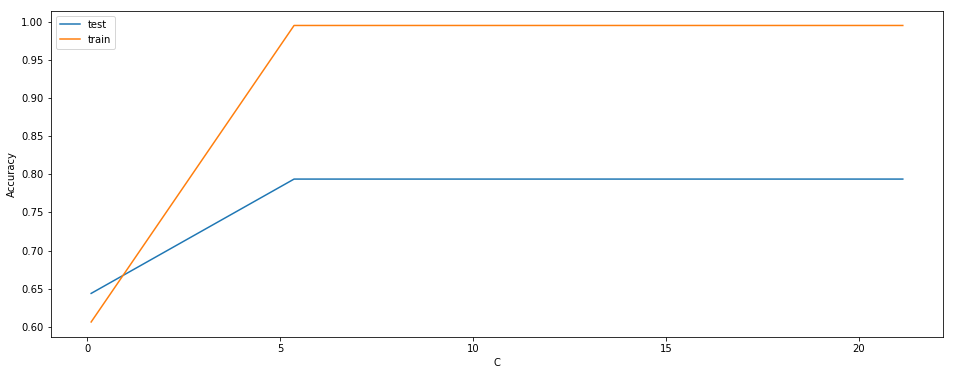

In [452]:
plt.figure(figsize=(16,6))
plt.plot(ker_C_opt_grid.param_C, ker_C_opt_grid.mean_test_score, label = 'test')
plt.plot(ker_C_opt_grid.param_C, ker_C_opt_grid.mean_train_score, label = 'train')

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()